# COMP41680 Assignment 1: Data Collection & Preparation

**Author**      : Kamran Azmat  
**Student No**  : 16204691  
**Email**       : kamran.azmat@ucdconnect.ie  

<hr>

## Objective:

Collect a dataset from one or more open web APIs of your choice, and use Python to pre-process and analyse the collected data

## Tasks:

- Choose one or more suitable web APIs as the source data
- Collect data from the chosen API(s) using Python
- Parse the collected data, and store it in an appropriate file format for subsequent analysis
- Load and represent the data using an appropriate data structure. Apply any pre-processing steps that might be required to clean/filter/combine the data before analysis
- Analyse and summarise the cleaned dataset, using visualisation

### Task 1: API selection

API selected for this assignment is provide by **Fixer.io**.  
They provide JSON API for foreign exchange rates and currency conversion.

> **Fixer.io** is a free JSON API for current and historical foreign exchange rates published by the European Central Bank.  
> The rates are updated daily around 4PM CET.  


#### Usage:

Get the latest foreign exchange reference rates in JSON format.  
```sh
$ curl http://api.fixer.io/latest
$ curl http://api.fixer.io/latest?base=USD
```

### Task 2: Data Collection using Python

In [24]:
# import packages
import requests
import datetime
from datetime import timedelta
import json
import pandas as pd
import numpy as np

In [2]:
# today's data
i = datetime.datetime.now()

In [3]:
# specify start date for data collection
# start_date
year = 2010
day = "%02d" % 1

# present year and month
current_year = i.year
current_month = i.month

# define base currency
base_currency = "INR"

In [5]:
# load data function
def load_data():
    """
    Loads data from fixer.io given the base currency and start date
    """
    # use global variables
    global year, day, current_year, base_currency, current_month
    
    # initialize dictionary for storing data
    json_data = {}
    
    while year <= current_year:
        if year == current_year:
            month_end = current_month
        else:
            month_end = 12

        for month in range(1, month_end+1):             
            # Format: 2001-01-03 (YYYY-MM-DD)
            today = str(year) + "-" + str("%02d" % month) + "-" + str(day)
            
            # Sample: http://api.fixer.io/2001-02-12?base=EUR
            url = "https://api.fixer.io/" + today + "?base=" + base_currency
            
            print(today, url)
            r = requests.get(url)
            data = r.json()

            json_data[today] = data["rates"]
        year += 1
    
    return json_data

In [6]:
# load data
json_data = load_data()

2010-01-01 https://api.fixer.io/2010-01-01?base=INR
2010-02-01 https://api.fixer.io/2010-02-01?base=INR
2010-03-01 https://api.fixer.io/2010-03-01?base=INR
2010-04-01 https://api.fixer.io/2010-04-01?base=INR
2010-05-01 https://api.fixer.io/2010-05-01?base=INR
2010-06-01 https://api.fixer.io/2010-06-01?base=INR
2010-07-01 https://api.fixer.io/2010-07-01?base=INR
2010-08-01 https://api.fixer.io/2010-08-01?base=INR
2010-09-01 https://api.fixer.io/2010-09-01?base=INR
2010-10-01 https://api.fixer.io/2010-10-01?base=INR
2010-11-01 https://api.fixer.io/2010-11-01?base=INR
2010-12-01 https://api.fixer.io/2010-12-01?base=INR
2011-01-01 https://api.fixer.io/2011-01-01?base=INR
2011-02-01 https://api.fixer.io/2011-02-01?base=INR
2011-03-01 https://api.fixer.io/2011-03-01?base=INR
2011-04-01 https://api.fixer.io/2011-04-01?base=INR
2011-05-01 https://api.fixer.io/2011-05-01?base=INR
2011-06-01 https://api.fixer.io/2011-06-01?base=INR
2011-07-01 https://api.fixer.io/2011-07-01?base=INR
2011-08-01 h

In [7]:
# get sample data - date: 2017-04-01
print(json_data["2017-04-01"])

{'MXN': 0.28846, 'IDR': 205.17, 'TRY': 0.056046, 'USD': 0.015406, 'THB': 0.52919, 'NZD': 0.02206, 'ZAR': 0.2052, 'PLN': 0.060904, 'CNY': 0.10612, 'PHP': 0.77321, 'HRK': 0.1073, 'BGN': 0.028183, 'KRW': 17.213, 'HKD': 0.11971, 'SEK': 0.13736, 'HUF': 4.4328, 'GBP': 0.012328, 'AUD': 0.020148, 'CZK': 0.3895, 'SGD': 0.021529, 'CHF': 0.015413, 'DKK': 0.10718, 'NOK': 0.13212, 'EUR': 0.01441, 'RUB': 0.86911, 'MYR': 0.068178, 'RON': 0.065602, 'ILS': 0.055987, 'CAD': 0.020556, 'JPY': 1.7227, 'BRL': 0.048706}


In [8]:
# get a string representing json object
json_data = json.dumps(json_data)

### Task 3: Parse the collected data, and store it in an appropriate file format for subsequent analysis

In [9]:
# convert the JSON string to pandas object
df = pd.read_json(json_data)

In [10]:
# transpose the DataFrame
df = df.T

# save to csv file format
filename = "currency_data_" + base_currency + ".csv"
df.to_csv(filename)

### Task 4: Load and represent the data using an appropriate data structure. Apply any pre-processing steps that might be required to clean/filter/combine the data before analysis

In [11]:
# load currency data and make 'date' column as index
currency_data = pd.read_csv(filename, parse_dates = [0], index_col = 0)

In [12]:
# filter data
# delete all the currencies above a given threshold

threshold = 0.5 # for INR

for currency in currency_data.columns:
    curr_mean = (currency_data[currency].mean())
    if curr_mean > threshold:
        del currency_data[currency]

In [14]:
# handle missing data
# find all the columns with missing data
null_count = currency_data.isnull().sum()

In [15]:
# for each currency having missing data, replace it with 0
for currency in null_count.iteritems():
    if(currency[1] != 0):
        null_currency = currency[0]
        currency_data[null_currency] = currency_data[null_currency].fillna(0)

In [16]:
# tabular representatio
currency_data

,AUD,BGN,BRL,CAD,CHF,CNY,CZK,DKK,EEK,EUR,...,MYR,NOK,NZD,PLN,RON,SEK,SGD,TRY,USD,ZAR
2010-01-01,0.023878,0.029174,0.037460,0.022566,0.022130,0.146700,0.39488,0.111010,0.23340,0.014916,...,0.073577,0.12381,0.029539,0.061225,0.063191,0.15292,0.030122,0.032141,0.021489,0.15910
2010-02-01,0.024407,0.030312,0.040482,0.023043,0.022822,0.147220,0.40397,0.115390,0.24251,0.015499,...,0.073632,0.12703,0.030647,0.062064,0.063332,0.15719,0.030455,0.032152,0.021563,0.16326
2010-03-01,0.024202,0.031337,0.039209,0.022858,0.023464,0.147930,0.41552,0.119250,0.25071,0.016023,...,0.073344,0.12910,0.031152,0.063130,0.065870,0.15646,0.030485,0.033454,0.021671,0.16649
2010-04-01,0.024393,0.032487,0.039788,0.022627,0.023552,0.152710,0.42166,0.123660,0.25991,0.016611,...,0.072896,0.13317,0.031775,0.063882,0.068239,0.16160,0.031271,0.034020,0.022371,0.16282
2010-05-01,0.024197,0.033113,0.038871,0.022651,0.024280,0.153860,0.43218,0.126010,0.26491,0.016931,...,0.071789,0.13281,0.030905,0.066305,0.069923,0.16290,0.030842,0.033450,0.022543,0.16529
2010-06-01,0.025464,0.034123,0.038840,0.022273,0.024745,0.144850,0.44713,0.129790,0.27299,0.017447,...,0.070141,0.13856,0.031502,0.071776,0.073046,0.16777,0.029996,0.033651,0.021207,0.16388
2010-07-01,0.025665,0.034025,0.038859,0.022831,0.022925,0.145430,0.44831,0.129580,0.27221,0.017397,...,0.069359,0.13996,0.031422,0.072666,0.075575,0.16704,0.029966,0.034014,0.021447,0.16674
2010-08-01,0.023931,0.032354,0.037922,0.022256,0.022400,0.146010,0.40988,0.123260,0.25884,0.016543,...,0.068556,0.13136,0.029798,0.066311,0.070319,0.15605,0.029335,0.032594,0.021552,0.15817
2010-09-01,0.023599,0.032639,0.037330,0.022629,0.021639,0.145500,0.41278,0.124240,0.26112,0.016688,...,0.066831,0.13255,0.030225,0.066579,0.071171,0.15602,0.028832,0.032517,0.021361,0.15719
2010-10-01,0.023107,0.032020,0.037714,0.023060,0.021976,0.150360,0.39980,0.122010,0.25617,0.016372,...,0.069337,0.13163,0.030370,0.064455,0.069833,0.15092,0.029495,0.032508,0.022472,0.15573


### Task 5: Analyse and summarise the cleaned dataset, using visualisation

In [17]:
# store all the dates
dates = currency_data.index.values

In [18]:
# enable inline matplot
%matplotlib inline

In [32]:
def visualise_data(currency_data):
    """
    Uses matplotlib package to visualise data
    """
    import matplotlib.pyplot as plt
        
    plt.figure(figsize=(12, 14))
    
    # remove the plot frame lines
    ax = plt.subplot(111)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # enable gridline for y-axis
    ax.yaxis.grid(True)
    
    # change the x-axis limit to occupy texts
    plt.xlim(dates[0] - np.timedelta64(10, 'D'), dates[-1] + np.timedelta64(180, 'D'))
    
    # famous currencies
    famous = ["USD", "EUR", "JPY", "GBP", "AUD", "CAD", "CHF", "CNY", "SEK", "NZD", "MXN", "SGD", "HKD", "NOK", "KRW", "TRY", "RUB", "EUR", "BRL", "ZAR"]
    
    # plot for every currency
    for curr in currency_data.columns:
        if curr in famous:
            plt.plot(dates, currency_data[curr], lw=2.5)
            x_pos = dates[-1] + np.timedelta64(30, 'D')
            y_pos = currency_data[curr].values[-1]
            ax.annotate(curr, xy=(x_pos, y_pos), xytext=(x_pos, y_pos))
          
    ymin, ymax = ax.get_ylim()
    xmin, xmax = ax.get_xlim()
    
    # give title
    ax.annotate("Famous Currency Comparison with Indian Rupee (INR)"
       ", by currency (2010-today)", xy=(dates[0], ymax), xytext=(dates[2], ymax+0.01), fontsize=16)
    
    # data source
    plt.text(dates[0], -0.035, "Data source: http://fixer.io/"
       "\nMade by: Kamran Azmat [kamran.azmat@ucdconnect.ie | 16204691]"
       "\nNote: Some currencies are missing because of missing historical data and filtering", fontsize=10)
    
    plt.savefig("currency_data.png", bbox_inches="tight", dpi=100)
    plt

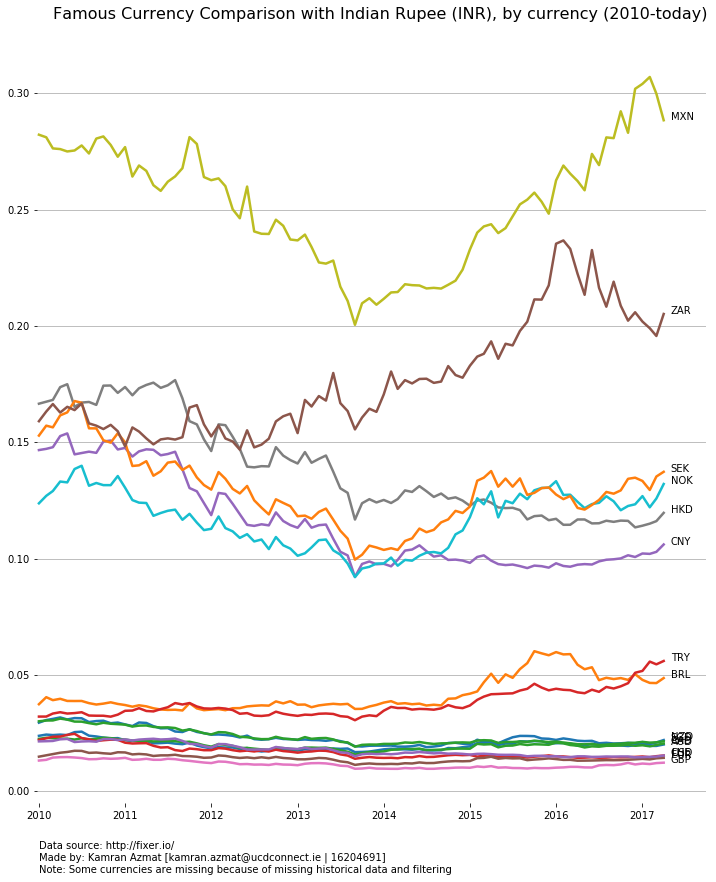

In [33]:
visualise_data(currency_data)

Plotly link: https://plot.ly/~azmat.kamran/19/

### Conclusion:

This visualisation can help us find out the relationship between a give a currency (here - INR) and other famous currencies.